In [1]:
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from functools import partial
from sklearn.preprocessing import normalize

In [2]:
# the density matrix to swap test to discern unique values
dev2 = qml.device('default.qubit', wires=6)

@qml.qnode(dev2)
def cswap():
    # input state
    coeff = np.sqrt(np.array([1/3,1/3,1/3]))
    base = np.array([[0,1],[1,0],[1,1]])
    qml.Superposition(coeff, base, wires=[1,2,3], work_wire=3)
    # ref state
    qml.Hadamard(4)
    qml.Hadamard(5)
    
    qml.Hadamard(0)
    qml.CSWAP([0,1,4])
    qml.CSWAP([0,2,5])
    qml.Hadamard(0)
    
    return qml.probs(0)

cswap()

array([0.875, 0.125])

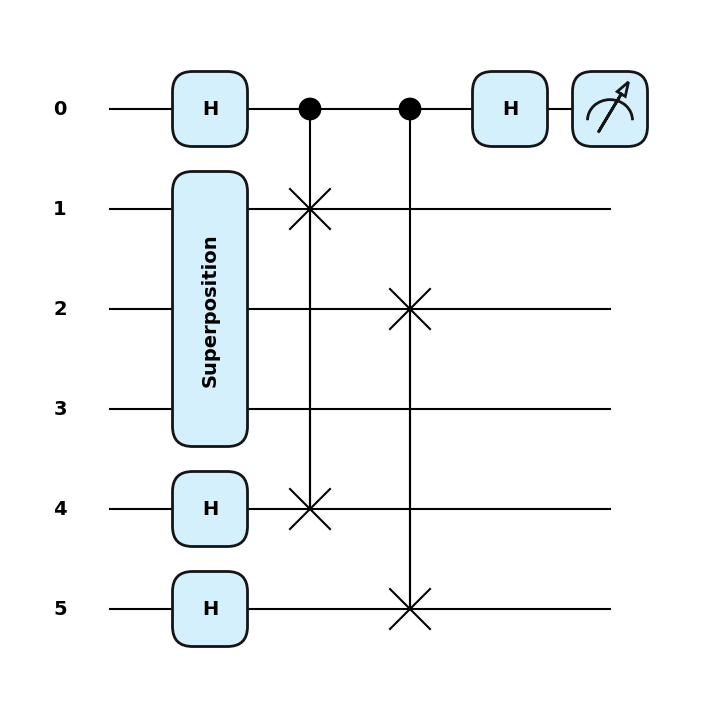

In [3]:
fig, _ = qml.draw_mpl(cswap, style="pennylane", show_all_wires=True)()

In [4]:
fig.savefig('multiQubitSwap.png')